In [1]:
# Generic ones
import numpy as np
import pandas as pd
import os

# Word processing libraries
import re
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

# Widen the size of each cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import glob
import gzip

# dfs=[]
data = None
total_count=0
keywords_str='#chinavirus|#wuhanvirus|#chopstickflu|#kungfuvirus|#chinesevirus|#kungflu|#communistvirus|#wuhancoronavirus|#coronajihad'
print('filtering by:', keywords_str)

for file in glob.glob("E:\\Projects\\twitter_covid\\2020-05\\*.gz"):
    print(file)
    df = pd.read_json(path_or_buf=file, lines=True, compression='infer')
#     print('Read. Size: ', df.shape)
    
    total_count+=df.shape[0]
    df = df[df['full_text'].str.contains("(?i)"+keywords_str)]
    df.reset_index(inplace = True, drop = True)
    if data is None:
        data = df
    else:
        data = pd.concat([data, df], axis = 0)
        # Reset_index
        data.reset_index(inplace = True, drop = True)
        
data_orig=data.copy()

print('Size of dataset before filtering:', total_count)
print('Size of dataset after filtering:', data.shape[0])



filtering by: #chinavirus|#wuhanvirus|#chopstickflu|#kungfuvirus|#chinesevirus|#kungflu|#communistvirus|#wuhancoronavirus|#coronajihad
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-01-00.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-01-04.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-01-16.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-02-01.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-02-02.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-02-04.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-02-15.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-02-19.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-02-22.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-03-04.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-03-09.jsonl.gz
E:\Proj

In [3]:
data['hashtags'] = data['entities'].apply(lambda x: x['hashtags'])
data['hashtags'].head(3)

0    [{'text': 'Michigan', 'indices': [48, 57]}, {'...
1    [{'text': 'COVID19', 'indices': [53, 61]}, {'t...
2         [{'text': 'KungFlu', 'indices': [163, 171]}]
Name: hashtags, dtype: object

In [4]:
# Remove empty tweets
data.dropna(subset = ['full_text'], inplace = True)
# The unicode accounts for Chinese characters and punctuations.
def strip_chinese_words(string):
    # list of english words
    en_list = re.findall(u'[^\u4E00-\u9FA5\u3000-\u303F]', str(string))
    
    # Remove word from the list, if not english
    for c in string:
        if c not in en_list:
            string = string.replace(c, '')
    return string
# Apply strip_chinese_words(...) on the column 'text'
data['full_text'] = data['full_text'].apply(lambda x: strip_chinese_words(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status,extended_entities,withheld_in_countries,hashtags
0,2020-05-01 00:12:08+00:00,1256013500997963776,1256013500997963776,"Hundreds of Protesters, Some Armed, Seek End t...",False,"[0, 135]","{'hashtags': [{'text': 'Michigan', 'indices': ...","<a href=""https://www.smartnews.com/"" rel=""nofo...",NaN,NaN,...,0,0,False,False,0.0,en,NaN,NaN,NaN,"[{'text': 'Michigan', 'indices': [48, 57]}, {'..."
1,2020-05-01 00:12:11+00:00,1256013513555955712,1256013513555955712,Why can't we have a leader that tells it like ...,False,"[0, 122]","{'hashtags': [{'text': 'COVID19', 'indices': [...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0,3,False,False,0.0,en,{'created_at': 'Thu Apr 30 23:53:11 +0000 2020...,NaN,NaN,"[{'text': 'COVID19', 'indices': [53, 61]}, {'t..."
2,2020-05-01 00:12:30+00:00,1256013593285443585,1256013593285443584,@TuckerCarlson - I watched you religiously eve...,False,"[0, 275]","{'hashtags': [{'text': 'KungFlu', 'indices': [...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0,0,False,False,NaN,en,NaN,NaN,NaN,"[{'text': 'KungFlu', 'indices': [163, 171]}]"
3,2020-05-01 00:12:39+00:00,1256013627439677440,1256013627439677440,"RT @Dr_xebat: Trump, virüsün çıkış noktasının ...",False,"[0, 139]","{'hashtags': [{'text': 'ChinaVirus', 'indices'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,4,0,False,False,NaN,tr,NaN,NaN,NaN,"[{'text': 'ChinaVirus', 'indices': [120, 131]}..."
4,2020-05-01 00:13:03+00:00,1256013731403874307,1256013731403874304,RT @UNNTV1: Dogs are snatched from the #Chines...,False,"[0, 140]","{'hashtags': [{'text': 'Chinese', 'indices': [...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,738,0,False,False,NaN,en,NaN,NaN,NaN,"[{'text': 'Chinese', 'indices': [39, 47]}, {'t..."


In [5]:
# Define function to sieve out @users in a tweet:
def mentioned_users(string):
    usernames = re.findall('@[^\s]+', string)
    return usernames
# Create a new column and apply the function on the column 'text'
data['mentioned_users'] = data['full_text'].apply(lambda x: mentioned_users(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status,extended_entities,withheld_in_countries,hashtags,mentioned_users
0,2020-05-01 00:12:08+00:00,1256013500997963776,1256013500997963776,"Hundreds of Protesters, Some Armed, Seek End t...",False,"[0, 135]","{'hashtags': [{'text': 'Michigan', 'indices': ...","<a href=""https://www.smartnews.com/"" rel=""nofo...",NaN,NaN,...,0,False,False,0.0,en,NaN,NaN,NaN,"[{'text': 'Michigan', 'indices': [48, 57]}, {'...",[]
1,2020-05-01 00:12:11+00:00,1256013513555955712,1256013513555955712,Why can't we have a leader that tells it like ...,False,"[0, 122]","{'hashtags': [{'text': 'COVID19', 'indices': [...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,3,False,False,0.0,en,{'created_at': 'Thu Apr 30 23:53:11 +0000 2020...,NaN,NaN,"[{'text': 'COVID19', 'indices': [53, 61]}, {'t...",[]
2,2020-05-01 00:12:30+00:00,1256013593285443585,1256013593285443584,@TuckerCarlson - I watched you religiously eve...,False,"[0, 275]","{'hashtags': [{'text': 'KungFlu', 'indices': [...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0,False,False,NaN,en,NaN,NaN,NaN,"[{'text': 'KungFlu', 'indices': [163, 171]}]",[@TuckerCarlson]
3,2020-05-01 00:12:39+00:00,1256013627439677440,1256013627439677440,"RT @Dr_xebat: Trump, virüsün çıkış noktasının ...",False,"[0, 139]","{'hashtags': [{'text': 'ChinaVirus', 'indices'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,NaN,tr,NaN,NaN,NaN,"[{'text': 'ChinaVirus', 'indices': [120, 131]}...",[@Dr_xebat:]
4,2020-05-01 00:13:03+00:00,1256013731403874307,1256013731403874304,RT @UNNTV1: Dogs are snatched from the #Chines...,False,"[0, 140]","{'hashtags': [{'text': 'Chinese', 'indices': [...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,False,False,NaN,en,NaN,NaN,NaN,"[{'text': 'Chinese', 'indices': [39, 47]}, {'t...",[@UNNTV1:]


In [6]:
# Define Emoji_patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)
# Define the function to implement POS tagging:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Define the main function to clean text in various ways:
def clean_text(text):
    
    # Apply regex expressions first before converting string to list of tokens/words:
    # 1. remove @usernames
    text = re.sub('@[^\s]+', '', text)
    
    # 2. remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)
    
    # 3. remove hashtags entirely i.e. #hashtags
    text = re.sub(r'#([^\s]+)', '', text)
    
    # 4. remove emojis
    text = emoji_pattern.sub(r'', text)
    
    # 5. Convert text to lowercase
    text = text.lower()
    
    # 6. tokenise text and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # 7. remove numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # 8. remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # 9. remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # 10. pos tag text and lemmatize text
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # 11. remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    
    return(text)
# Apply function on the column 'text':
data['cleaned_text'] = data['full_text'].apply(lambda x: clean_text(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorited,retweeted,possibly_sensitive,lang,quoted_status,extended_entities,withheld_in_countries,hashtags,mentioned_users,cleaned_text
0,2020-05-01 00:12:08+00:00,1256013500997963776,1256013500997963776,"Hundreds of Protesters, Some Armed, Seek End t...",False,"[0, 135]","{'hashtags': [{'text': 'Michigan', 'indices': ...","<a href=""https://www.smartnews.com/"" rel=""nofo...",NaN,NaN,...,False,False,0.0,en,NaN,NaN,NaN,"[{'text': 'Michigan', 'indices': [48, 57]}, {'...",[],hundred protester arm seek end lockdown\n
1,2020-05-01 00:12:11+00:00,1256013513555955712,1256013513555955712,Why can't we have a leader that tells it like ...,False,"[0, 122]","{'hashtags': [{'text': 'COVID19', 'indices': [...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,False,False,0.0,en,{'created_at': 'Thu Apr 30 23:53:11 +0000 2020...,NaN,NaN,"[{'text': 'COVID19', 'indices': [53, 61]}, {'t...",[],can't leader tell like
2,2020-05-01 00:12:30+00:00,1256013593285443585,1256013593285443584,@TuckerCarlson - I watched you religiously eve...,False,"[0, 275]","{'hashtags': [{'text': 'KungFlu', 'indices': [...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,False,False,NaN,en,NaN,NaN,NaN,"[{'text': 'KungFlu', 'indices': [163, 171]}]",[@TuckerCarlson],watch religiously every day...before laura ing...
3,2020-05-01 00:12:39+00:00,1256013627439677440,1256013627439677440,"RT @Dr_xebat: Trump, virüsün çıkış noktasının ...",False,"[0, 139]","{'hashtags': [{'text': 'ChinaVirus', 'indices'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,False,NaN,tr,NaN,NaN,NaN,"[{'text': 'ChinaVirus', 'indices': [120, 131]}...",[@Dr_xebat:],rt trump virüsün çıkış noktasının çin/wuhan’da...
4,2020-05-01 00:13:03+00:00,1256013731403874307,1256013731403874304,RT @UNNTV1: Dogs are snatched from the #Chines...,False,"[0, 140]","{'hashtags': [{'text': 'Chinese', 'indices': [...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,False,False,NaN,en,NaN,NaN,NaN,"[{'text': 'Chinese', 'indices': [39, 47]}, {'t...",[@UNNTV1:],rt dog snatch street skin alive leather


In [7]:
# Define a function to perform this extraction:
def extract_hashtags(hashtag_list):
    # argument:
    # hashtag_list - a list of dictionary(ies), each containing a hashtag
    
    # Create a list to store the hashtags
    hashtags = []
    if isinstance(hashtag_list, float):
        hashtag_list=[]
    
    # Loop through the list:
    for i in range(0, len(hashtag_list)):
        # extract the hashtag value using the key - 'text'
        # For our purposes, we can ignore the indices, which tell us the position of the hashtags in the string of tweet
        # lowercase the text as well
        hashtags.append(hashtag_list[i]['text'].lower())
        
    return hashtags
# Apply function on the column - data['hashtags']
data['hashtags'] = data['hashtags'].apply(lambda x: extract_hashtags(x))
# Check out the updated column 'hashtags'
print(data.head()['hashtags'])

0    [michigan, wuhancoronavirus, fridaythoughts, s...
1    [covid19, coronaviruscanada, chinaliedpeopledi...
2                                            [kungflu]
3                                  [chinavirus, trump]
4    [chinese, china, chinavirus, nezamanakadar, st...
Name: hashtags, dtype: object


In [8]:
#Show hashtags
        
data[data['hashtags'].apply(lambda x: True if len(x)>0 else False)]['hashtags']

0       [michigan, wuhancoronavirus, fridaythoughts, s...
1       [covid19, coronaviruscanada, chinaliedpeopledi...
2                                               [kungflu]
3                                     [chinavirus, trump]
4       [chinese, china, chinavirus, nezamanakadar, st...
                              ...                        
2153                                 [कलूआ, chinesevirus]
2154                    [heelsupharris, wuhancoronavirus]
2155                                         [chinavirus]
2156                                 [कलूआ, chinesevirus]
2157                                  [china, chinavirus]
Name: hashtags, Length: 2158, dtype: object

In [9]:
data['location'] = df.user.apply(lambda x: x['location'])
data['acctdesc'] = df.user.apply(lambda x: x['description'])
data[['location','acctdesc']].head(3)

,location,acctdesc
0,"USA, NJ",The folks that wrote US Constitution knew what...
1,Burbs of Chicago,"patriot, proud American, America First, suppor..."
2,,Welcome here. Married/ Father of two awesome k...


In [10]:
# Replace NaN (empty) values with n.a to indicate that the user did not state his location
# Define a function to handle this:
def remove_nan(text):
    if pd.isnull(text) == True: # entry is NaN
        text = 'n.a'
    else:
        # lowercase text for possible easy handling
        text = text.lower()
        
    return text
# Apply function on column - data['location']
data['location'] = data['location'].apply(lambda x: remove_nan(x))
# Check out the updated columns
print(data.head()['location'])
# Let's take a quick look at the value_counts()
data['location'].value_counts()

0                       usa, nj
1             burbs of chicago 
2                              
3    free-market jesus paradise
4                    durango mx
Name: location, dtype: object


n.a                             2107
                                  19
florida, usa                       3
texas, usa                         1
california, usa                    1
usa, nj                            1
                                   1
tejas, usa                         1
colorado, usa                      1
burbs of chicago                   1
arizona, usa                       1
india. (bharat)                    1
durango mx                         1
r magaville                        1
tuxtla gtz                         1
aridzona, usa                      1
uɐʍıɐʇ 'ʎʇıɔ ıǝdıɐʇ 'uɐɥsuǝʍ       1
sussex                             1
hong kong                          1
islote, puerto rico                1
free-market jesus paradise         1
'merica                            1
china                              1
earth                              1
.                                  1
germany                            1
new delhi, india                   1
j

In [11]:
# Apply the function already defined above: remove_nan(...)
# Apply function on column - data['acctdesc']
data['acctdesc'] = data['acctdesc'].apply(lambda x: remove_nan(x))
# Check out the updated columns
print(data.head()['acctdesc'])

0    the folks that wrote us constitution knew what...
1    patriot, proud american, america first, suppor...
2    welcome here. married/ father of two awesome k...
3    inactivist & justice beer drinker. plays guita...
4    "la cucaracha, la cucaracha, \nya no puede cam...
Name: acctdesc, dtype: object


In [12]:
# Importing VADER from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Create a sid object called SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()
# Apply polarity_score method of SentimentIntensityAnalyzer()
data['sentiment'] = data['cleaned_text'].apply(lambda x: sid.polarity_scores(x))
# Keep only the compound scores under the column 'Sentiment'
data = pd.concat([data.drop(['sentiment'], axis = 1), data['sentiment'].apply(pd.Series)], axis = 1)

In [13]:
# New column: number of characters in 'review'
data['numchars'] = data['cleaned_text'].apply(lambda x: len(x))
# New column: number of words in 'review'
data['numwords'] = data['cleaned_text'].apply(lambda x: len(x.split(" ")))
# Check the new columns:
data.tail(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,mentioned_users,cleaned_text,location,acctdesc,neg,neu,pos,compound,numchars,numwords
2156,2020-05-22 16:50:59+00:00,1263875011716288515,1263875011716288512,RT @JainKiran6: आखिरकार #कलूआ को #ChineseVirus...,False,"[0, 121]","{'hashtags': [{'text': 'कलूआ', 'indices': [24,...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,[@JainKiran6:],rt आखिरकार को \nने निगल लिया...भगवान महाकाल कल...,n.a,n.a,0.000,1.000,0.0,0.0000,80,14
2157,2020-05-22 16:51:16+00:00,1263875086710267909,1263875086710267904,"RT @RhondaHurley2: @jonfavs @reedtcampbell 90,...",False,"[0, 140]","{'hashtags': [{'text': 'China', 'indices': [10...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,"[@RhondaHurley2:, @jonfavs, @reedtcampbell]",rt american dead million unemployed \n\n,n.a,n.a,0.518,0.482,0.0,-0.6486,38,6


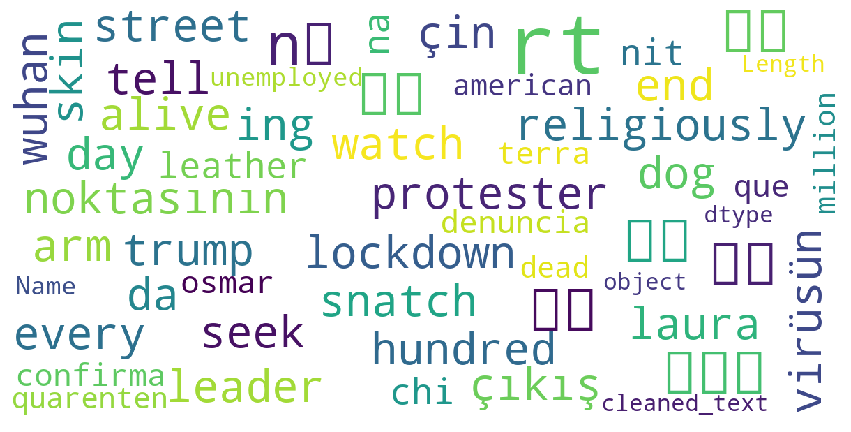

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))
    fig = plt.figure(1, figsize = (15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data['cleaned_text'])

In [15]:
# the column data['hashtags'] returns a list of string(s) for each tweet. Build a list of all hashtags in the dataset.
hashtag_list = []
for i in range(0, len(data)):
    # Obtain the current list of hashtags
    curr_hashtag = data.iloc[i, :]['hashtags']
    
    # Extract and append the hashtags to 'hashtag_list':
    for j in range(0, len(curr_hashtag)):
        hashtag_list.append(curr_hashtag[j])
        
# No. of hashtags
print('No. of hashtags used in {} tweets is {}'.format(len(data), len(hashtag_list)))

df_hashtag = pd.DataFrame(
    {'hashtags': hashtag_list}
)
print(df_hashtag.head(20))
print('Shape of df_hashtag is:', df_hashtag.shape)

No. of hashtags used in 2158 tweets is 6496
               hashtags
0              michigan
1      wuhancoronavirus
2        fridaythoughts
3             smartnews
4               covid19
5     coronaviruscanada
6   chinaliedpeopledied
7            chinavirus
8               cdnpoli
9               kungflu
10           chinavirus
11                trump
12              chinese
13                china
14           chinavirus
15        nezamanakadar
16             stayhome
17         chinesevirus
18   chinaliedpeopledie
19           chinavirus
Shape of df_hashtag is: (6496, 1)


                    hashtags  counts
213             chinesevirus    1014
191               chinavirus     591
1294        wuhancoronavirus     411
1306              wuhanvirus     355
298              coronavirus     225
157                    china     188
334                  covid19     149
148                 ccpvirus     108
177      chinaliedpeopledied      97
141                      ccp      62
174   chinaliedandpeopledied      61
1290                   wuhan      55
890                obamagate      54
343                 covid_19      53
182             chinamustpay      50
728                  kungflu      48
778             makechinapay      37
352                 covidー19      34
1277                     who      33
333                    covid      33
769                     maga      33
118             boycottchina      31
976                    qanon      30
145                 ccpchina      30
142         ccp_is_terrorist      25
1312                 wwg1wga      25
2

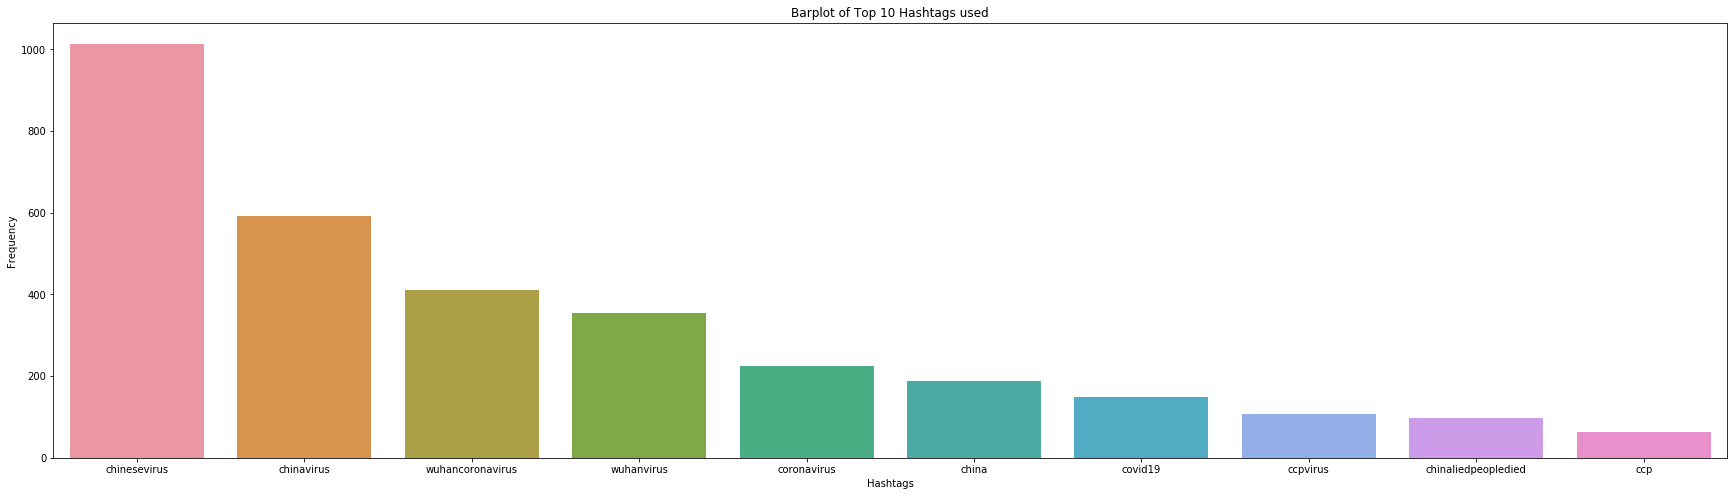

In [16]:
import seaborn as sns

# Define N to be the top number of hashtags
N = 50
top_hashtags = df_hashtag.groupby(['hashtags']).size().reset_index(name = 'counts').sort_values(by = 'counts', ascending = False).head(N)
print(top_hashtags)
# seaborn countplot on the top N hashtags
plt.figure(figsize=(30,8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'hashtags', y = 'counts', data = top_hashtags.head(10))
plt.title('Barplot of Top ' + str(10) + ' Hashtags used')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.show()

In [17]:
def isNaN(num):
    return num != num

def get_full_name(x):
    if x is None or isNaN(x):
        return None
    else:
        return x['full_name']
data['place_full_name']=data['place'].apply(lambda x: get_full_name(x))

data[data['place_full_name'].apply(lambda x: x is not None)]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,cleaned_text,location,acctdesc,neg,neu,pos,compound,numchars,numwords,place_full_name
31,2020-05-01 00:59:19+00:00,1256025374305054720,1256025374305054720,if Kung Fu Panda is A Real Person https://t.co...,False,"[0, 97]","{'hashtags': [{'text': 'ChinaLiedPeopleDied', ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,kung fu panda real person,,#truth #qcoronavirus #wwg1wga #sanaticundergro...,0.540,0.460,0.000,-0.6908,25,5,"Fort Saskatchewan, Alberta"
34,2020-05-01 04:15:50+00:00,1256074829666627585,1256074829666627584,"@palkisu Man, Palki Sharma is on fire! She is ...",False,"[9, 183]",{'hashtags': [{'text': 'ChinaLiedAndPeopleDied...,"<a href=""http://twitter.com/download/android"" ...",1.255753e+18,1.255753e+18,...,man palki sharma fire absolute delight watch e...,,"i'm a country girl, born and raised in the gre...",0.246,0.391,0.363,0.4767,73,11,"Halifax, Nova Scotia"
178,2020-05-02 04:09:24+00:00,1256435595817046018,1256435595817046016,Passed? Another virus related to seafood is de...,False,"[0, 76]","{'hashtags': [{'text': 'china', 'indices': [58...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,pass another virus relate seafood develop,n.a,n.a,0.000,1.000,0.000,0.0000,41,6,"Sai Kung District, Hong Kong"
527,2020-05-06 11:12:12+00:00,1257991551088652288,1257991551088652288,Badi ajeeb baat hai jab africa se koi virus fe...,False,"[0, 249]","{'hashtags': [{'text': 'ChineseVirus', 'indice...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,badi ajeeb baat hai jab africa se koi virus fe...,n.a,n.a,0.000,1.000,0.000,0.0000,199,38,"Bhopal, India"
585,2020-05-06 19:53:19+00:00,1258122692542132226,1258122692542132224,if there is no #WuhanCoronaVirus https://t.co/...,False,"[0, 32]","{'hashtags': [{'text': 'WuhanCoronaVirus', 'in...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,,n.a,n.a,0.000,0.000,0.000,0.0000,0,1,Gaston Park
622,2020-05-08 08:13:14+00:00,1258671288006164480,1258671288006164480,It would be a shame if #ChineseVirus began to ...,False,"[0, 52]","{'hashtags': [{'text': 'ChineseVirus', 'indice...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,would shame begin trend,n.a,n.a,0.508,0.492,0.000,-0.4767,23,4,"Franklin Lakes, NJ"
745,2020-05-08 16:05:57+00:00,1258790251197108224,1258790251197108224,Self Defense. #2A Hope he didn’t die of #Chine...,False,"[0, 154]","{'hashtags': [{'text': '2A', 'indices': [14, 1...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,self defense hope didn’t die go begin open tom...,n.a,n.a,0.222,0.455,0.324,-0.0516,74,12,"Nevada, USA"
804,2020-05-08 16:30:30+00:00,1258796430027874304,1258796430027874304,#ChineseVirus\nChina should get the investigat...,False,"[0, 280]","{'hashtags': [{'text': 'ChineseVirus', 'indice...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,\nchina get investigation do wire scroll print...,n.a,n.a,0.048,0.759,0.193,0.6369,185,23,"Gurgaon, India"
848,2020-05-08 16:54:27+00:00,1258802456554803200,1258802456554803200,@RealJamesWoods #ChineseVirus,False,"[16, 29]","{'hashtags': [{'text': 'ChineseVirus', 'indice...","<a href=""http://twitter.com/download/iphone"" r...",1.258618e+18,1.258618e+18,...,,n.a,n.a,0.000,0.000,0.000,0.0000,0,1,"Houston, TX"
850,2020-05-08 16:54:36+00:00,1258802491321397248,1258802491321397248,@antonioguterres @WHO @DrTedros @realDonaldTru...,False,"[0, 276]","{'hashtags': [{'text': 'WuhanCoronaVirus', 'in...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,\nfinely spokesperson accept start wuhan china...,n.a,n.a,0.000,0.524,0.476,0.8720,120,15,"Kanpur, India"


In [18]:
data[data['coordinates'].apply(lambda x: x is not None)]


,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,cleaned_text,location,acctdesc,neg,neu,pos,compound,numchars,numwords,place_full_name



Wordcloud for Keyword:  chinesevirus


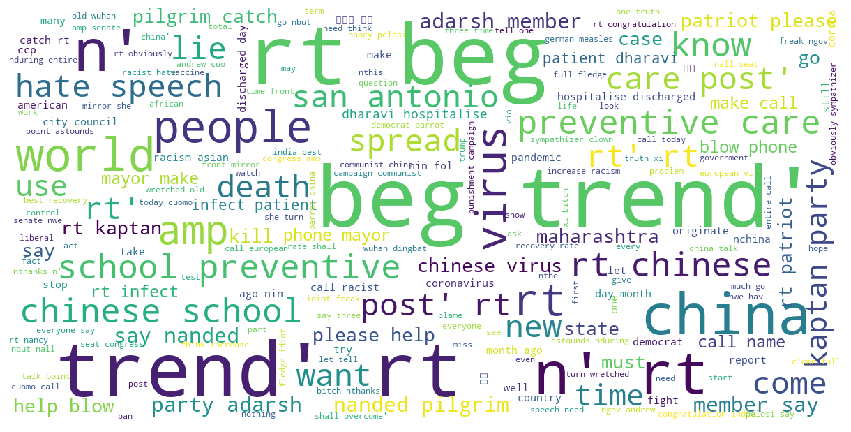


Wordcloud for Keyword:  chinaliedpeopledied


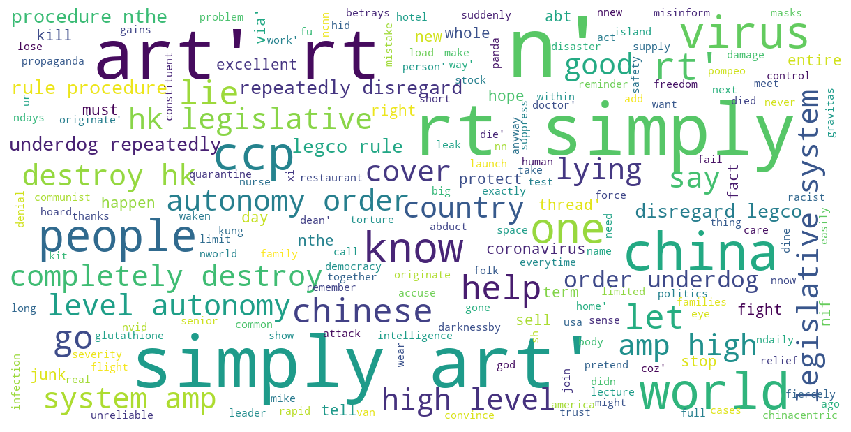


Wordcloud for Keyword:  chinesebioterrorism


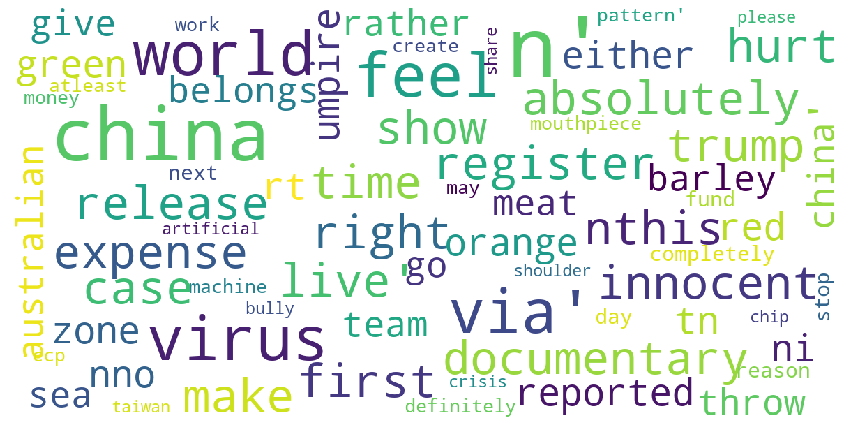


Wordcloud for Keyword:  chinazi


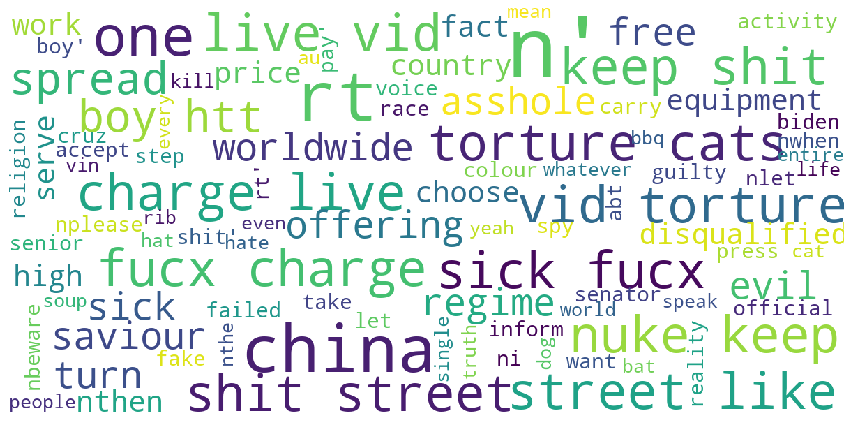

In [19]:
keyword_ts=['chinesevirus','chinaliedpeopledied','chinesebioterrorism','chinazi']
for keyword_t in keyword_ts:
    print('\nWordcloud for Keyword: ', keyword_t)
    df_t = data[data['full_text'].str.contains("(?i)#"+keyword_t)]
    show_wordcloud(df_t['cleaned_text'].values)